# PUI Homework 5: Assignment 2

In [13]:
__author__ = 'Federica Bianco, modified by Ruben Hambardzumyan, rh2684'

## 1. Set up

In [8]:
# Importing the libraries

from __future__ import print_function
import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats

% pylab inline

# Specifying the significance level

alpha = 0.05

# Setting up the seed for reproducibility

np.random.seed(321)

Populating the interactive namespace from numpy and matplotlib


In [9]:
#generate the distribution

dist_n = np.random.randn(1000) 

#test ad and ks. those are easy
print ("normal on normal", scipy.stats.kstest(dist_n,'norm'))
print ("normal on normal", scipy.stats.anderson(dist_n, dist='norm'))
print ("")

normal on normal KstestResult(statistic=0.023123118597677017, pvalue=0.65883367489718692)
normal on normal AndersonResult(statistic=0.1839168329261156, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))



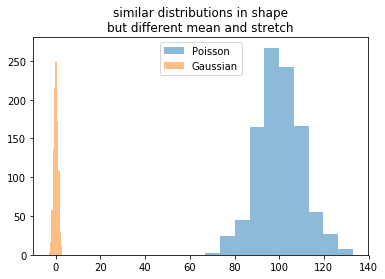

poisson on normal KstestResult(statistic=1.0, pvalue=0.0)
poisson on normal AndersonResult(statistic=1.2939599022688526, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In this case the means are different, so the distributions will be different for KS and AD test. I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian but I want the mean to be the same as for my Gaussian: mean=0. Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1


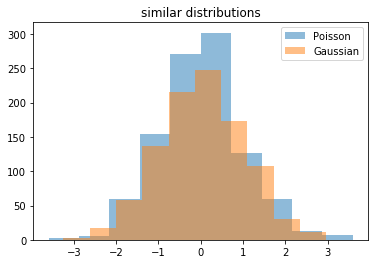

poisson vs normal KstestResult(statistic=0.045253117750073568, pvalue=0.032267923521570152)
poisson vs normal AndersonResult(statistic=1.3256100086978222, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
KS: no longer rejecting the H0 at alpha=0.05 (p~0.3)
AD: statistics AD=0.93 larger than threshold (for alpha=0.05) 
thresh_0.05 = 0.784 0.784


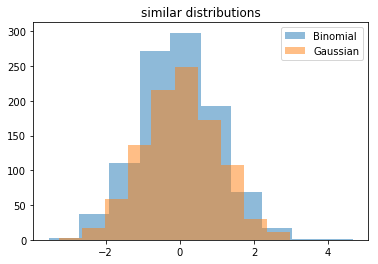

binomial vs normal KstestResult(statistic=0.044313379729563729, pvalue=0.038212098515615134)
binomial vs normal AndersonResult(statistic=1.182132277507435, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [10]:
# poisson with 1000 elements, lambda=100 (high)
dist_p = np.random.poisson(100, 1000)
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions in shape\nbut different mean and stretch")
pl.show()
print ("poisson on normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson on normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("\n\nIn this case the means are different, " + 
       "so the distributions will be different for KS and AD test. " + 
       "I want a distribution with 'Poisson with high mean' shape cause that is more Gaussian " + 
       "but I want the mean to be the same as for my Gaussian: mean=0. "
       "Similarly, the standard deviation is sqrt(lambda) = sqrt(100). I want it to be 1") 


dist_p = (np.random.poisson(100, 1000) - 100) * 0.1 #-100 fixes mean, *0.1 fixes stdev
pl.figure()
pl.hist(dist_p, alpha=0.5, label="Poisson")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("poisson vs normal", scipy.stats.kstest(dist_p,'norm'))
print ("poisson vs normal", scipy.stats.anderson(dist_p, dist='norm'))
print ("KS: no longer rejecting the H0 at alpha=0.05 (p~0.3)") 
print ("AD: statistics AD=0.93 larger than threshold (for alpha=0.05) ") 

threshold = scipy.stats.anderson(dist_n, 
                                 dist='norm')[1][scipy.stats.anderson(dist_n, 
                                                                      dist='norm')[2]==[5.0]]
print ("thresh_0.05 = 0.784", threshold[0])

#binomial with n=10, p=0.5 => mean=np=5, stdev=sqrt(np(1-p))

n, p = 200, 0.5
dist_b = (np.random.binomial(n, p, 1000) - n * p) / np.sqrt(n * p * (1 - p))  #subtract mean divide by stdev
pl.figure()
pl.hist(dist_b, alpha=0.5, label="Binomial")
pl.hist(dist_n, alpha=0.5, label="Gaussian")
pl.legend()
pl.title("similar distributions")
pl.show()

print ("binomial vs normal", scipy.stats.kstest(dist_b,'norm'))
print ("binomial vs normal", scipy.stats.anderson(dist_b, dist='norm'))

# Null Hypothesis for both KS and AD test:

## the two sample distributions do not come from the same population

In [11]:
# KL Divergence

# np.histogram returns the value of the histogram (y) and the edges of the bins (x). 
# Notice: the edges, not the centers
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)
distpdf_p, mybins_p, = np.histogram(dist_p, density=True)

#notice the extra comma on the left side of the '=' sign: 
#that tells numpy take the first two values returned, 
#and throw away the rest

In [12]:
#get the bin centers
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
bincenters_p = mybins_p[:-1] + 0.5*(mybins_p[1] - mybins_p[0])

print ('the KL test returns the "entropy". ' + 
       "To figure out what the number means thoug in terms of NULL rejection, help yourself " + 
       "with the fact that you know what the result should be for these three distributions!")
print ("normal on normal", 
    scipy.stats.entropy(distpdf_n, 
                            scipy.stats.norm.pdf(bincenters_n)) )
print ("poisson on normal", 
       scipy.stats.entropy(distpdf_p, 
                                scipy.stats.norm.pdf(bincenters_p)))

print ("binomial on normal", 
       scipy.stats.entropy(distpdf_b, 
                                scipy.stats.norm.pdf(bincenters_p)))

#you can interpret this as a distance: 
# it increases as the distributions diverge

the KL test returns the "entropy". To figure out what the number means thoug in terms of NULL rejection, help yourself with the fact that you know what the result should be for these three distributions!
normal on normal 0.00281562581616
poisson on normal 0.0146284768438
binomial on normal 0.14385539163


# 2. BINOMIAL Distribution

## Null Hypotheses:

## KS-test: The binomial distribution is the same as the normal distribution

## AD-test: The binomial distribution sample comes from the normal distribution

## KL-test: The binomial distribution entropy level is the same as the normal distribution

In [32]:
# defining the missing variables

narray = np.arange(1, 300, 2)

ks_s_b = np.zeros(narray.size, dtype=float)
ks_p_b = np.zeros(narray.size, dtype=float)
kl_b = np.zeros(narray.size, dtype=float)
ad_b = np.zeros(narray.size, dtype=float) 

In [33]:
#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.binomial(n, p, 1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))
    #pl.plot(bincenters,np.histogram(dist, bins=mybins)[0]  / 1000., 'k')
    #pl.plot(bincenters, scipy.stats.norm.pdf(bincenters), 'r')
    #pl.show()

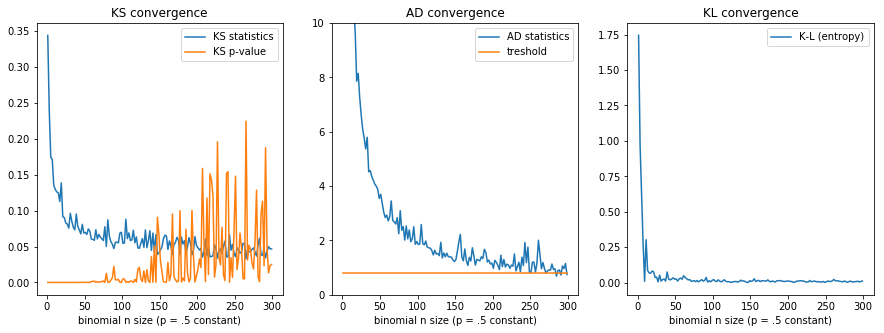

In [34]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.title("KS convergence")
pl.xlabel("binomial n size (p = .5 constant)")
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.title("AD convergence")
pl.xlabel("binomial n size (p = .5 constant)")
pl.legend()

fig.add_subplot(133)
pl.title("KL convergence")
pl.xlabel("binomial n size (p = .5 constant)")


pl.plot(narray, kl_b, label='K-L (entropy)')
pl.legend();

## KS convergence: as np increases, KS statistics become closer to 0. Meanwhile, the p-value increases to 1.

## AD convergence: the AD statistics approach to the threshold line and cross the line closer to the np values of 280+

## KL convergence: as the np increases, KL entropy closes to 0.

# 3. POISSON Distribution

## Null Hypotheses:

## KS-test: The poisson distribution is the same as the normal distribution

## AD-test: The poisson distribution sample comes from the normal distribution

## KL-test: The poisson distribution entropy level is the same as the normal distribution

In [41]:
narray = np.arange(1, 300, 2)

ks_s_b = np.zeros(narray.size, dtype=float)
ks_p_b = np.zeros(narray.size, dtype=float)
kl_b = np.zeros(narray.size, dtype=float)
ad_b = np.zeros(narray.size, dtype=float) 

In [42]:
#loop over the different values of n (or n and p)
for i,n in enumerate(narray):
    p = 0.5 #parameter for the binomial, my arbitrary choice
    #generate the distribution
    dist = (np.random.poisson(1, size=1000) - n * p ) / np.sqrt(n * p * (1-p))
    #run the tests. 
    ks_s_b[i] = scipy.stats.kstest(dist,'norm')[0]
    ks_p_b[i] = scipy.stats.kstest(dist,'norm')[1]
    #print (scipy.stats.kstest(dist,'norm'))
    #print (scipy.stats.anderson(dist, dist='norm'))
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    #ad_b[i] = ad_b[i] / ad_b[0]
    #print ad_b[i]
  
    # for KL and Pearson's chisq I have to simulate the normal distribution as well
    mybins = np.linspace(min(dist), max(dist), 10) 
    bincenters = mybins[:-1] + 0.5 * (mybins[1] - mybins[0])

    #when i was coding this up something was wrong. i put some plots in to figure out what... 
    # just so you know.
    #if i%10 == 0: 
    #    pl.hist(dist, bins=mybins)
    #    pl.plot(bincenters, scipy.stats.norm.pdf(bincenters)*1000)
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0] / 1000., 
                                    scipy.stats.norm.pdf(bincenters))
    #pl.plot(bincenters,np.histogram(dist, bins=mybins)[0]  / 1000., 'k')
    #pl.plot(bincenters, scipy.stats.norm.pdf(bincenters), 'r')
    #pl.show()

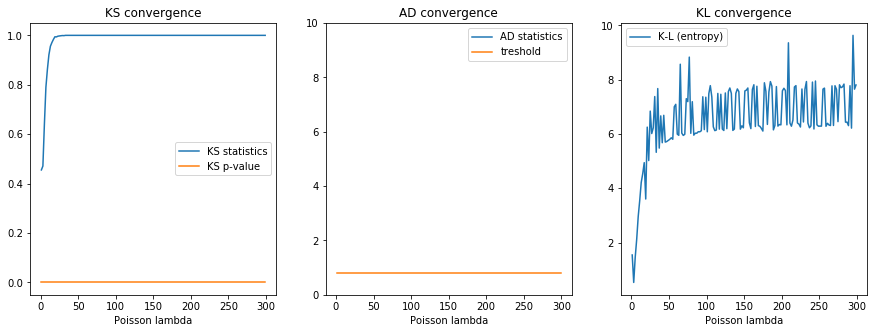

In [43]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_s_b, label='KS statistics')
pl.plot(narray, ks_p_b, label='KS p-value')
pl.title("KS convergence")
pl.xlabel("Poisson lambda")
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD statistics')
pl.plot([narray[0], narray[-1]],[threshold, threshold], label="treshold")
pl.ylim(0,10) #limit the y range or you cannot see the relevant part
pl.title("AD convergence")
pl.xlabel("Poisson lambda")
pl.legend()

fig.add_subplot(133)
pl.title("KL convergence")
pl.xlabel("Poisson lambda")


pl.plot(narray, kl_b, label='K-L (entropy)')
pl.legend();

## KS convergence: as lambda increases, KS statistics become closer to 1.

## KL convergence: as lambda increases, KL entropy increases as well.